In [1]:
import os, random
import numpy as np
import pandas as pd
 

import PIL
from PIL import Image
import six.moves.cPickle as pickle


import matplotlib.pyplot as plt

%matplotlib inline

/home/zenith/anaconda3/envs/no-blabla/lib/python3.5/site-packages/matplotlib/font_manager.py:280: UserWarning: Matplotlib is building the font cache using fc-list. This may take a moment.
  'Matplotlib is building the font cache using fc-list. '


In [3]:
!ls

prep_data.ipynb  test.jpg      test.zip  train_resize_
test		 test_resize_  train	 train.zip


In [10]:
os.makedirs('train_resize')
os.makedirs('train_resize/cats/')
os.makedirs('train_resize/dogs/')
os.makedirs('test_resize')

In [5]:
TRAIN_DIR = 'train/'
TEST_DIR = 'test/'

file = 'train/cat.35.jpg'

ROWS = 100
COLS = 100

# Liste de toutes les images pour l'entrainement
train_images = [TRAIN_DIR+i for i in os.listdir(TRAIN_DIR)]

# Liste de toutes les images pour l'inférence
test_images =  [TEST_DIR+i for i in os.listdir(TEST_DIR)]

## Récupérer le label (cat vs dog)

In [6]:
id_str = os.path.basename(file)
label = id_str.split(".")[0]
if label == "cat" :
    print("cat")
else :
    print("dog")


cat


(100, 100)


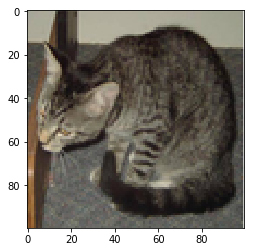

In [7]:
# Application à une image
img = Image.open(file)
img = img.resize((COLS,ROWS), PIL.Image.ANTIALIAS)
img.save('test.jpg')

print(img.size)

plt.imshow(img)
#plt.imshow(Image.open(file))

In [11]:
def read_image_train(file_path):
    id_str = os.path.basename(file_path)
    label = id_str.split(".")[0]
    if label == "cat" :
        label = 0
    else :
        label = 1
    img = Image.open(file_path)
    return img.resize((ROWS, COLS), PIL.Image.ANTIALIAS), label


def prep_data_train(images):
    count = len(images)

    for i, image_file in enumerate(images):
        
        image,label = read_image_train(image_file)
        
        if label==1 : 
            image.save("train_resize/dogs/{}.jpg".format(i))
        else:
            image.save("train_resize/cats/{}.jpg".format(i))
            
        if i%5000 == 0: 
            print('Processed {} of {}'.format(i, count))
   
    return None



prep_data_train(train_images)


Processed 0 of 25000
Processed 5000 of 25000
Processed 10000 of 25000
Processed 15000 of 25000
Processed 20000 of 25000


## Inférence avec `test_images`

Seulement 20 immages ! 
(sinon le serveur de Quiver va exploser !) 

In [14]:
import random

In [16]:
test_images_small = random.sample(test_images, 20)
print(test_images_small)

['test/5703.jpg', 'test/6111.jpg', 'test/2517.jpg', 'test/4699.jpg', 'test/6902.jpg', 'test/5583.jpg', 'test/1512.jpg', 'test/6762.jpg', 'test/5905.jpg', 'test/10556.jpg', 'test/9894.jpg', 'test/3046.jpg', 'test/6689.jpg', 'test/5697.jpg', 'test/1840.jpg', 'test/3945.jpg', 'test/3461.jpg', 'test/9726.jpg', 'test/7697.jpg', 'test/11550.jpg']


In [17]:
def read_image_test(file_path):
    img = Image.open(file_path)
    return img.resize((ROWS, COLS), PIL.Image.ANTIALIAS)


def prep_data_test(images):
    count = len(images)

    for i, image_file in enumerate(images):
        image = read_image_test(image_file)
        image.save("test_resize/{}.jpg".format(i))
        if i%5000 == 0: 
            print('Processed {} of {}'.format(i, count))
    
    return None

prep_data_test(test_images_small)

Processed 0 of 20
